In [5]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

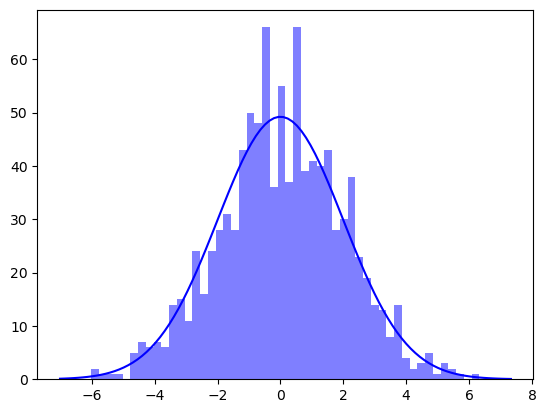

In [2]:
n = 1000
X = np.random.normal(0, 2, n)
x = np.linspace(X.min() - 1, X.max() + 1, 100)
bins = 50
bin_laius = (X.max() - X.min()) / bins

plt.hist(X, bins=bins, alpha=0.5, color='b')
plt.plot(x, st.norm.pdf(x, 0, 2) * n * bin_laius, color='b')

plt.show()

$\DeclareMathOperator*{\MEAN}{\mathbf{E}}$
$\DeclareMathOperator*{\VARIANCE}{\mathbf{D}}$
$\newcommand{\mean}[1]{\MEAN\left[#1\right]}$
$\newcommand{\variance}[1]{\VARIANCE\left[#1\right]}$
$\newcommand{\prob}[1]{\Pr\left[#1\right]}$

\begin{equation*}
    \variance{\frac{\widehat{p_A-p_B}}{p_A-p_B}}=\variance{\frac{\hat{\beta}\cdot\widehat{2q-1}}{\beta\cdot(2q-1)}}=\variance{\frac{\hat{\beta}}{\beta}}+\variance{\frac{\widehat{2q-1}}{2q-1}}+\variance{\frac{\hat{\beta}}{\beta}}\cdot\variance{\frac{\widehat{2q-1}}{2q-1}}\enspace.
\end{equation*}

\begin{equation*}
    \variance{\frac{\hat{\beta}}{\beta}}=\frac{1-\beta}{N\cdot\beta}
\end{equation*}

\begin{equation*}
    \variance{\frac{\widehat{2q-1}}{2q-1}}=\frac{1}{K}\cdot\left(\frac{1}{(2q-1)^2}-1\right) \enspace.
\end{equation*}

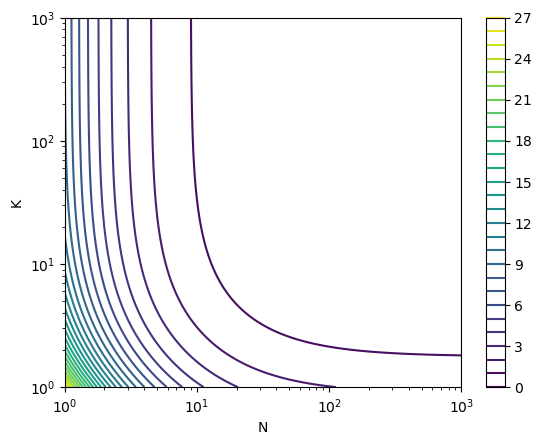

In [31]:
N, K = np.meshgrid(np.logspace(0, 3, num=1000), np.logspace(0, 3, num=1000))
q = 0.8
beta = 0.1

var1 = 1/N * (1 - beta) / beta
var2 = 1/K * (1 / (2 * q - 1)**2 - 1)
var = var1 + var2 + var1 * var2

#plt.title('Õigsuste vahe hinnangu relatiivse vea dispersioon')

plt.xlabel('N')
plt.xticks(np.logspace(0, 5, num=6))
plt.xscale('log')

plt.ylabel('K')
plt.yticks(np.logspace(0, 5, num=6))
plt.yscale('log')

plt.contour(N, K, var, 30)
plt.colorbar()

plt.savefig('graafikud/vahe_rel_vea_dispersioon.png')
plt.show()

\begin{align*}
    c_1&:=\frac{1-\beta}{\beta}\\
    c_2&:=\frac{1}{(2q-1)^2}-1\\\
\end{align*}

\begin{align*}
    N'&:=\frac{N}{c_1}\\
    K'&:=\frac{K}{c_2}\\
\end{align*}

\begin{equation*}
    \frac{1}{N'}+\frac{1}{K
    '}+\frac{1}{N'\cdot K'}
\end{equation*}

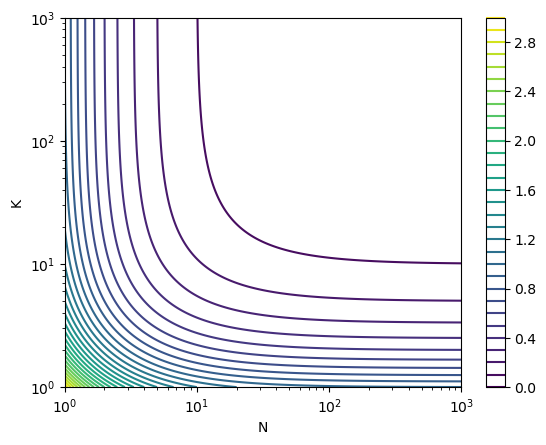

In [6]:
N, K = np.meshgrid(np.logspace(0, 3, num=1000), np.logspace(0, 3, num=1000))
Z = 1 / N + 1 / K + 1 / (N * K)

#plt.title('Õigsuste vahe hinnangu relatiivse vea dispersioon')

plt.xlabel('N')
plt.xticks(np.logspace(0, 5, num=6))
plt.xscale('log')

plt.ylabel('K')
plt.yticks(np.logspace(0, 5, num=6))
plt.yscale('log')

plt.contour(N, K, Z, 30)
plt.colorbar()

#plt.savefig('graafikud/vahe_rel_vea_dispersioon.png')
plt.show()

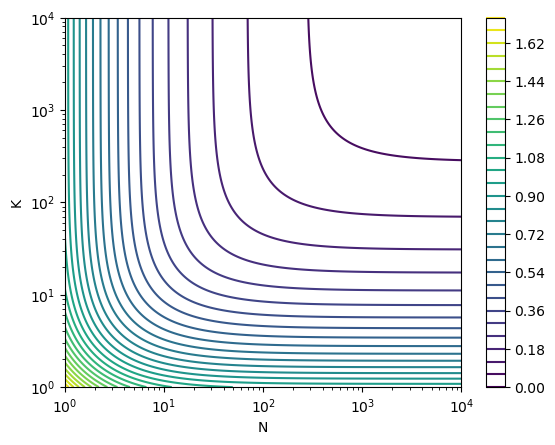

In [5]:
N, K = np.meshgrid(np.logspace(0, 4, num=1000), np.logspace(0, 4, num=1000))
Z = np.sqrt(1 / N + 1 / K + 1 / (N * K))

#plt.title('Õigsuste vahe hinnangu relatiivse vea standardhälve')

plt.xlabel('N')
plt.xticks(np.logspace(0, 5, num=6))
plt.xscale('log')

plt.ylabel('K')
plt.yticks(np.logspace(0, 5, num=6))
plt.yscale('log')

plt.contour(N, K, Z, 30)
plt.colorbar()

#plt.savefig('graafikud/vahe_rel_vea_std.png')
plt.show()

$K$ funktsioonina $N$ suhtes $\beta$ kaudu

\begin{equation*}
    p_A - p_B = c
\end{equation*}    
\begin{equation*}    
    K = N \cdot \frac{\beta}{1-\beta} \cdot \left( \frac{\beta^2}{c^2} - 1 \right)
\end{equation*}

In [40]:
import pandas as pd
from plotnine import ggplot, aes, labs, geom_line
from plotnine.scales import scale_x_log10, scale_y_log10

C:\Users\Mart\anaconda3\envs\tehisintellekt\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
C:\Users\Mart\anaconda3\envs\tehisintellekt\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log10


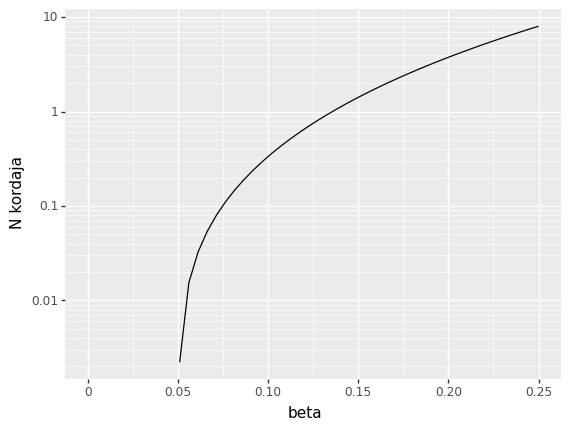

<ggplot: (121599362676)>

In [82]:
beta = np.linspace(0, 0.25)
c = 0.05
df = pd.DataFrame({'beta': beta, 'N kordaja': beta / (1 - beta) * ((beta / c)**2 - 1)})

(
    ggplot(df) +
    aes(x='beta', y='N kordaja') +
    scale_y_log10() +
    geom_line()
)

$K$ funktsioonina $N$ suhtes $2q-1$ kaudu

\begin{equation*}
    p_A - p_B = c
\end{equation*}    
\begin{equation*}    
    K = N \cdot \frac{c}{2q-1-c} \cdot \left( \frac{1}{(2q-1)^2} - 1 \right)
\end{equation*}

C:\Users\Mart\anaconda3\envs\tehisintellekt\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
C:\Users\Mart\anaconda3\envs\tehisintellekt\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log10
C:\Users\Mart\anaconda3\envs\tehisintellekt\lib\site-packages\plotnine\geoms\geom_path.py:75: PlotnineWarning: geom_path: Removed 2 rows containing missing values.


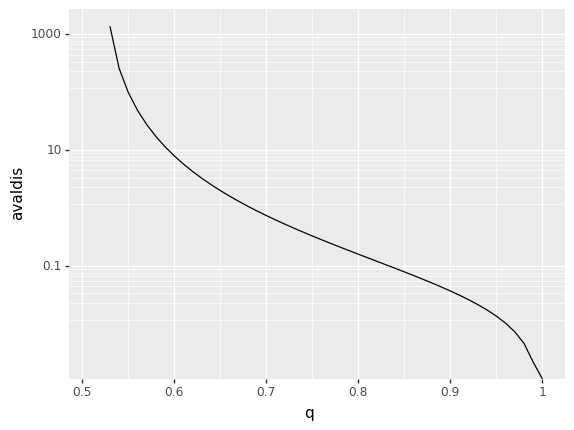

<ggplot: (121600904162)>

In [81]:
q = np.linspace(0.51, 1)
v = 2 * q - 1
c = 0.05
avaldis = c / (v - c) * (1/(v**2) - 1)

ggplot() + aes(x='q', y='avaldis') + scale_y_log10() + geom_line()

rel viga $\widehat{p_A-p_B}$

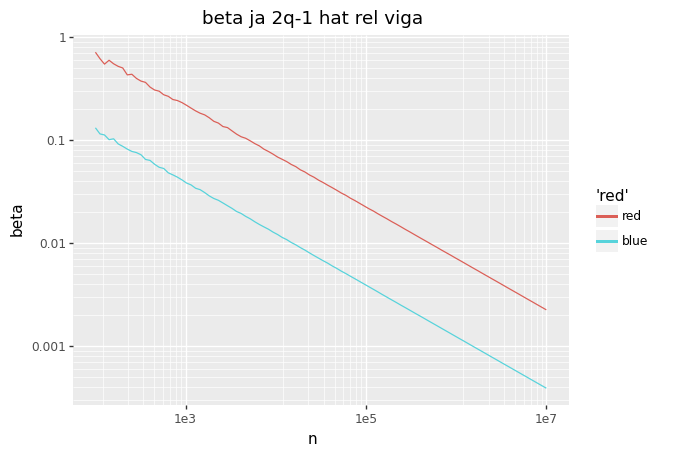

<ggplot: (121601010664)>

In [84]:
n = np.logspace(2, 7, num=100)
olulisus = 0.95
beta = 0.07
c = 0.05  # p_A - p_B
q = c / beta  # 2q - 1

epsilon_beta = 1 - st.binom.ppf(q=(1-olulisus)/2, p=beta, n=n) / (n * beta)
epsilon_q = 1 - st.binom.ppf(q=(1-olulisus)/2, p=q, n=n) / (n * q)

df = pd.DataFrame({'n': n, 'beta': epsilon_beta, '2q-1': epsilon_q})
    
(
    ggplot(df) +
    labs(title='beta ja 2q-1 hat rel viga') +
    scale_x_log10() +
    scale_y_log10() +
    geom_line(aes(x='n', y='beta', color="'red'")) +
    geom_line(aes(x='n', y='2q-1', color="'blue'"))
)

kui $N = 1e6$, siis rel viga (olulisusega $\alpha=0.95$) umbes $1\%$

\begin{equation}
    \delta_{ab} = \delta_{a} + \delta_{b} + \delta_{ab} \implies \delta_{b} = \frac{\delta_{ab}-\delta_{a}}{1+\delta_{ab}}
\end{equation}

et saada $\delta_{\widehat{p_A-p_B}}=10\%$ on vaja $\delta_{\widehat{2q-1}}\approx8\%$, ehk $K\approx225$

In [85]:
a=0.1-0.01
b=1+0.1
a/b

0.08181818181818182

In [86]:
np.argmin(np.abs(epsilon_q - 0.08))

7

In [87]:
n[7]

225.7019719633919